In [37]:
import pandas as pd
import sqlite3

In [38]:
conn = sqlite3.connect('../../data/professions.db')
query = "SELECT * FROM data"
df = pd.read_sql_query(query, conn)
conn.close()

In [39]:
df

,name,positions,category,desc,profile_codes,study_programme,keywords,keywords_extention
0,Агроном,"агроном,фитопатолог,агрохимик,селекционер,агро...",Агропромышленность,"Выращивает ягоды, овощи, фрукты, грибы, кормов...","35.02.05 - Агрономия, 35.03.03 - Агрохимия и а...",Агрономия - Институт непрерывного образования ...,"агрономия, выращивание, растения, удобрения, п...","агрономия, выращивание, растения, удобрения, п..."
1,Маркшейдер,"маркшейдер,шахтный инженер,геодезист,горный ин...","Архитектура, строительство и недвижимость","Исследует месторождения полезных ископаемых, п...","05.03.01 - Геология, 21.05.04 - Горное дело, 2...",Геология - Уфимский государственный нефтяной т...,"маркшейдер, геодезия, исследование месторожден...","маркшейдер, геодезия, исследование месторожден..."
2,Реставратор,"реставратор,консерватор,художник-реставратор,р...","Архитектура, строительство и недвижимость","Восстанавливает старинные здания, сооружения и...","07.02.01 - Архитектура, 54.02.04 - Реставрация...",BIM-проектирование - Калининградский бизнес-ко...,"реставрация, реставратор, консервация искусств...","реставрация, реставратор, консервация искусств..."
3,Слесарь по ремонту строительных машин,"слесарь по ремонту строительных машин,механик ...","Архитектура, строительство и недвижимость",Ремонтирует строительную технику<br><br>\n🔧 Ре...,23.02.03 - Техническое обслуживание и ремонт а...,Техническое обслуживание и ремонт автомобильно...,"слесарь, ремонт строительных машин, техническо...","слесарь, ремонт строительных машин, техническо..."
4,Монтажник санитарно-технических систем и обору...,монтажник санитарно-технических систем и обору...,"Архитектура, строительство и недвижимость",Устанавливает и обслуживает системы водоснабже...,08.01.26 - Мастер по ремонту и обслуживанию ин...,Мастер по ремонту и обслуживанию инженерных си...,"монтажник, сантехника, водоснабжение, канализа...","монтажник, сантехника, водоснабжение, канализа..."
...,...,...,...,...,...,...,...,...
95,Шеф-повар,"шеф-повар,кулинарный шеф,исполнительный шеф-по...",None,None,"19.01.17 - Повар, кондитер",None,None,"шеф-повар, повар, повара, гастрономия, кулинар..."
96,Стилист,"стилист,стилист-имиджмейкер,персональный стили...",None,None,43.02.03 - Стилистика и искусство визажа,None,None,"стилист, модный стилист, имидж-стилист, модная..."
97,Стоматолог,"стоматолог,терапевтический стоматолог,ортопеди...",None,None,"31.02.05 - Стоматология ортопедическая, \t31.0...",None,None,"стоматолог, стоматологическая практика, зубной..."
98,Нанотехнолог,"нанотехнолог,исследователь в области нанотехно...",None,None,"28.00.00 - Нанотехнологии и наноматериалы, 28....",None,None,"нанотехнолог, наноматериалы, нанороботы, наном..."


In [40]:
professions_keywords = {row['name']: row['keywords_extention'].split(', ') for _, row in df.iterrows()}

In [41]:
from collections import defaultdict
import matplotlib.pyplot as plt
from wordcloud import WordCloud

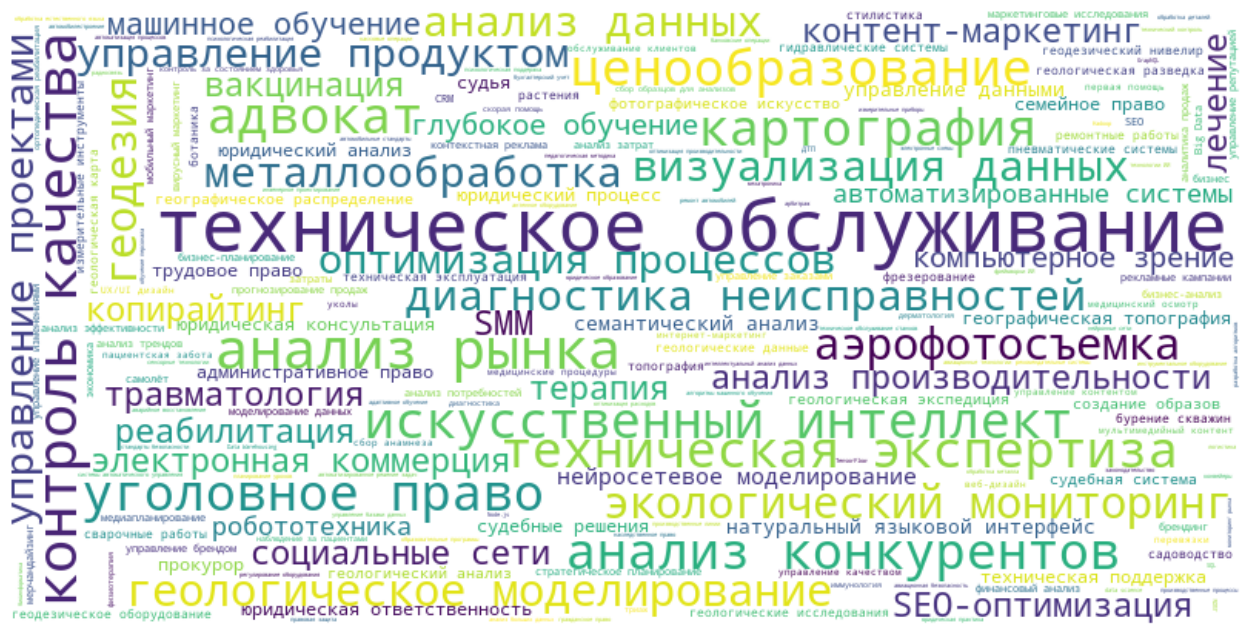

In [42]:
# Создание общего словаря для подсчета частоты слов
word_freq = defaultdict(int)

# Суммирование частоты каждого слова из всех профессий
for keywords in professions_keywords.values():
    for word in keywords:
        word_freq[word] += 1

# Создание облака слов на основе частоты
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Визуализация облака слов
plt.figure(figsize=(20, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

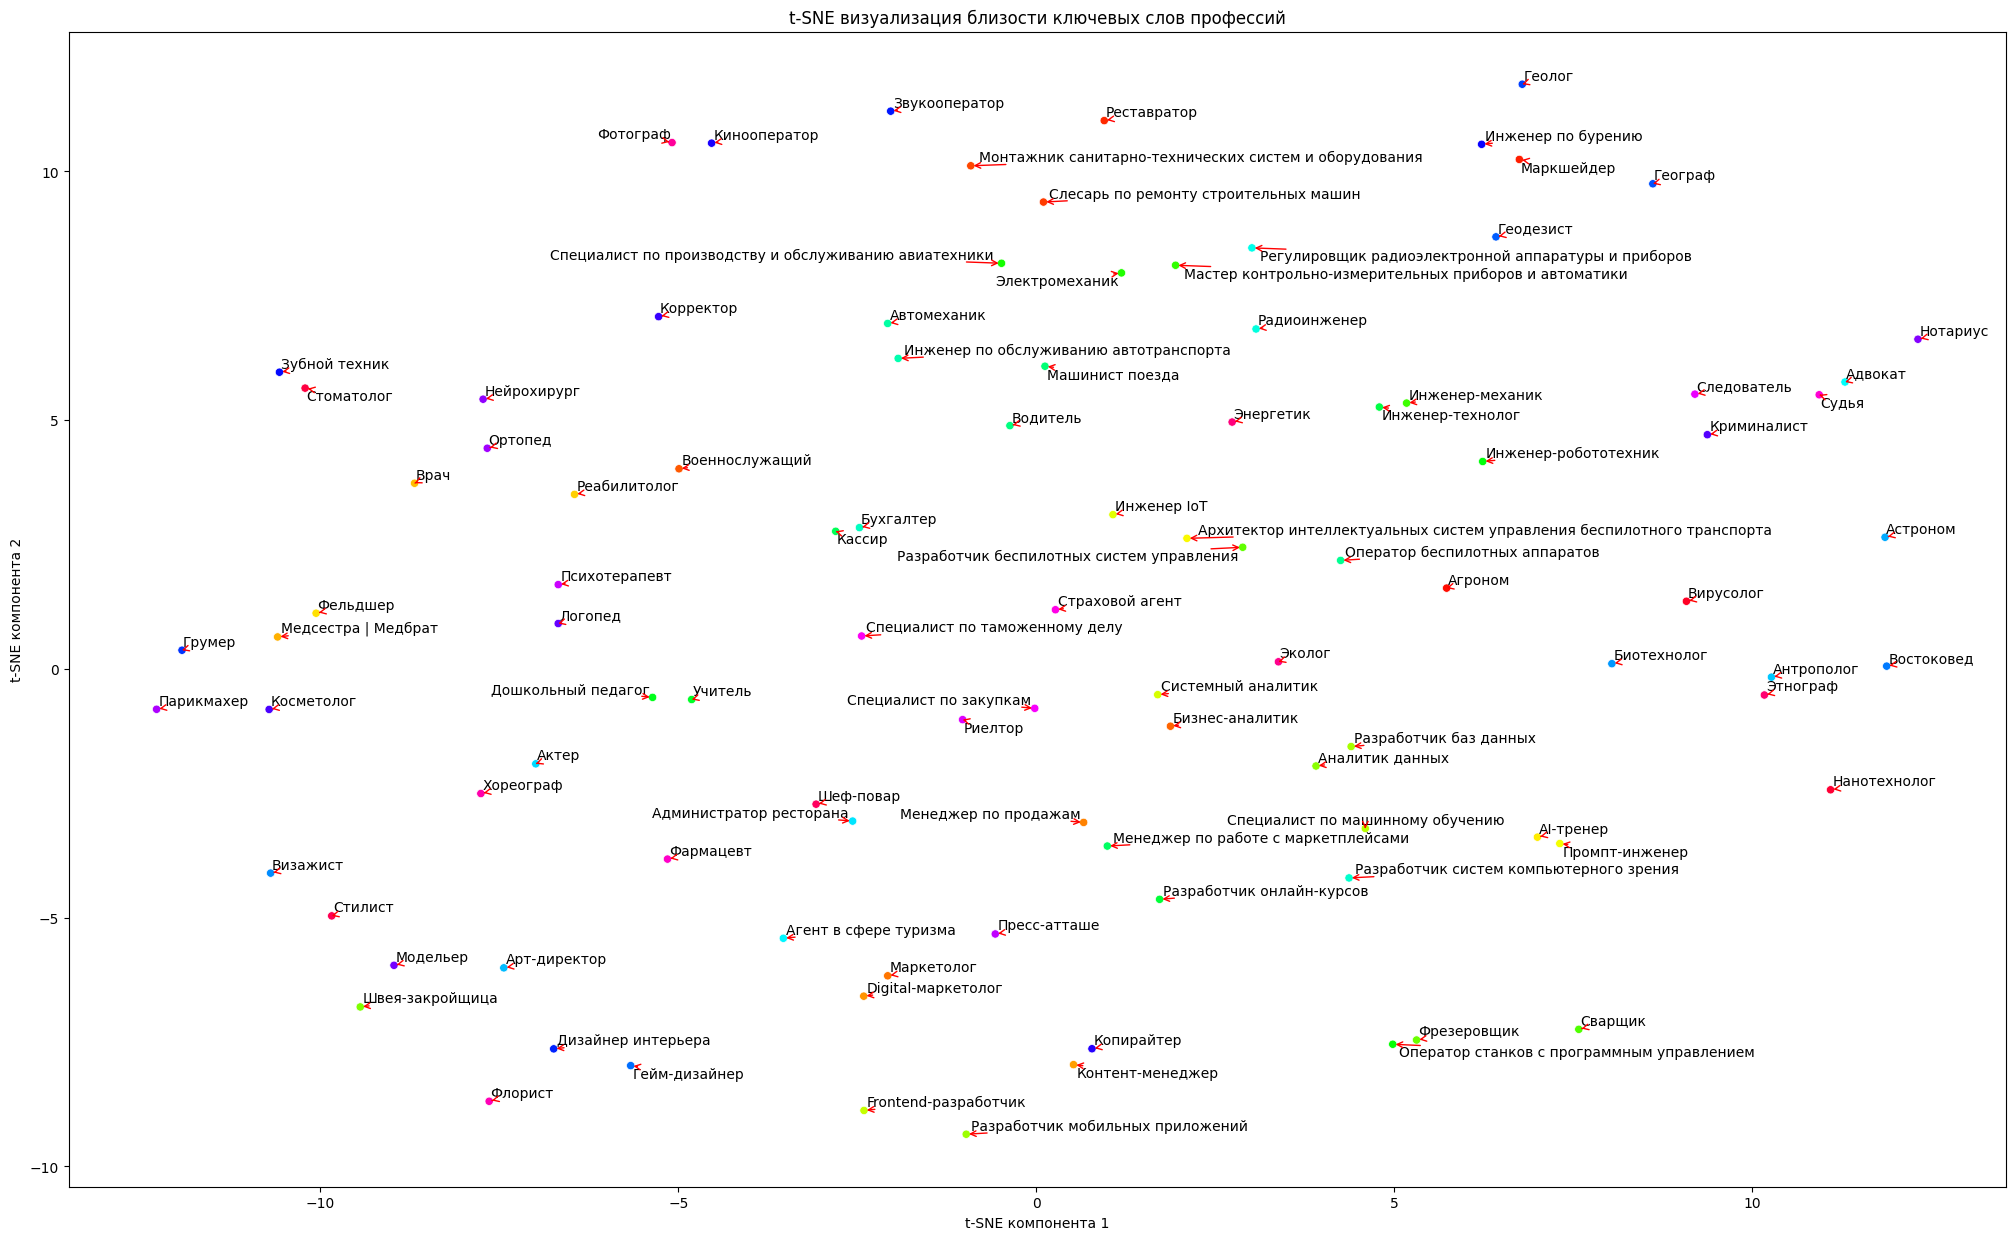

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE
import seaborn as sns
from adjustText import adjust_text

# Подготовка данных для векторизации
# Объединяем ключевые слова для каждой профессии в одну строку
corpus = [" ".join(keywords) for keywords in professions_keywords.values()]

# Создание векторов TF-IDF для ключевых слов
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(corpus)

# Использование t-SNE для уменьшения размерности
tsne = TSNE(n_components=2, random_state=0)
tsne_results = tsne.fit_transform(tfidf_matrix.toarray())

# Создание DataFrame для визуализации
tsne_df = pd.DataFrame({
    'TSNE1': tsne_results[:, 0],
    'TSNE2': tsne_results[:, 1],
    'Profession': professions_keywords.keys()
})

# Повышаем размер графика
plt.figure(figsize=(25, 15))

# Рисуем точки на графике
scatter_plot = sns.scatterplot(x="TSNE1", y="TSNE2", hue="Profession", data=tsne_df, legend=False, 
                               palette=sns.color_palette("hsv", len(professions_keywords)))

# Готовим подписи к каждой точке
texts = []
for i, point in tsne_df.iterrows():
    texts.append(plt.text(point['TSNE1'], point['TSNE2'], str(point['Profession'])))

# Используем adjust_text для автоматической коррекции подписей
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))

# Задаем заголовок и метки осей
plt.title('t-SNE визуализация близости ключевых слов профессий')
plt.xlabel('t-SNE компонента 1')
plt.ylabel('t-SNE компонента 2')

# Отображаем график
plt.show()
